Рассмотрим задачу Дирихле для уравнения Пуассона в области $\Omega$, состоящей из двух прямоугольников:   
$\Omega_1 = (0, a) \times (0, d)$ и $\Omega_2 = (0, c) \times (d, b)$, где $0 < c < a$ и $0 < d < b$.

Требуется найти функцию $u(x, y)$, удовлетворяющую уравнению:
$
\Delta u(x, y) = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = -f(x, y) = -|1 - x^2 - 2y^2|, \quad (x, y) \in \Omega
$

Граничные условия задаются следующим образом:

$\Gamma_1$: $u(x,y) = \psi_1(y) = 0$ при $x = a, 0 \leq y \leq d$

$\Gamma_2$: $u(x,y) = \psi_2(y) = |\sin(\pi x)|$ при $y = d, c \leq x \leq a$

$\Gamma_3$: $u(x,y) = \psi_3(x) = 0$ при $x = c, d \leq y \leq b$

$\Gamma_4$: $u(x,y) = \psi_4(x) = |\sin(2\pi x)|$ при $y = b, 0 \leq x \leq c$

$\Gamma_5$: $u(x,y) = \psi_5(y) = 0$ при $x = 0, 0 \leq y \leq b$

$\Gamma_6$: $u(x,y) = \psi_6(x) = |\sin(2\pi x)|$ при $y = 0, 0 \leq x \leq a$

Численно задача решается с помощью метода верхней релаксации

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = 2.0
b = 2.0
c = 1.0
d = 1.0

nx = 100
ny = 100
hx = a / (nx - 1)
hy = b / (ny - 1)

omega = 1.8
iterations = 500

def f(x, y):
    return np.abs(1 - x**2 - 2 * y**2)

def psi_1(x):
    return 0

def psi_2(x):
    return np.abs(np.sin(np.pi * x))

def psi_3(x):
    return 0

def psi_4(x):
    return np.abs(np.sin(2 * np.pi * x))

def psi_5(x):
    return 0

def psi_6(x):
    return np.abs(np.sin(2 * np.pi * x))

x = np.linspace(0, a, nx)
y = np.linspace(0, b, ny)
X, Y = np.meshgrid(x, y)

u = np.zeros((ny, nx))

u[: , 0] = [psi_5(yi) if yi <= b else 0 for yi in y]
u[0, : ] = [psi_6(xi) if xi <= a else 0 for xi in x]

for iteration in range(iterations):
    u_old = np.copy(u)

    for i in range(1, ny - 1):
        for j in range(1, nx - 1):
            if (i * hy <= d and j * hx <= a) or (i * hy > d and j * hx <= c):
                u[i, j] = (1 - omega) * u_old[i, j] + omega / (2 / hx**2 + 2 / hy**2) * \
                           ((u[i, j-1] + u[i, j+1]) / hx**2 + (u[i-1, j] + u[i+1, j]) / hy**2 + f(x[j], y[i]))

    u[1:ny-1, nx-1] = [psi_1(y[i]) if i * hy <= d else u[i, nx-1] for i in range(1, ny - 1)]
    u[int(d/hy), int(c/hx):nx] = [psi_2(x[j]) for j in range(int(c/hx), nx)]
    u[1:ny-1, int(c/hx)] = [psi_3(y[i]) if d < i * hy < b else u[i, int(c/hx)] for i in range(1, ny - 1)]
    u[ny - 1, 1:nx-1] = [psi_4(x[j]) if j * hx <= c else u[ny - 1, j] for j in range(1, nx - 1)]

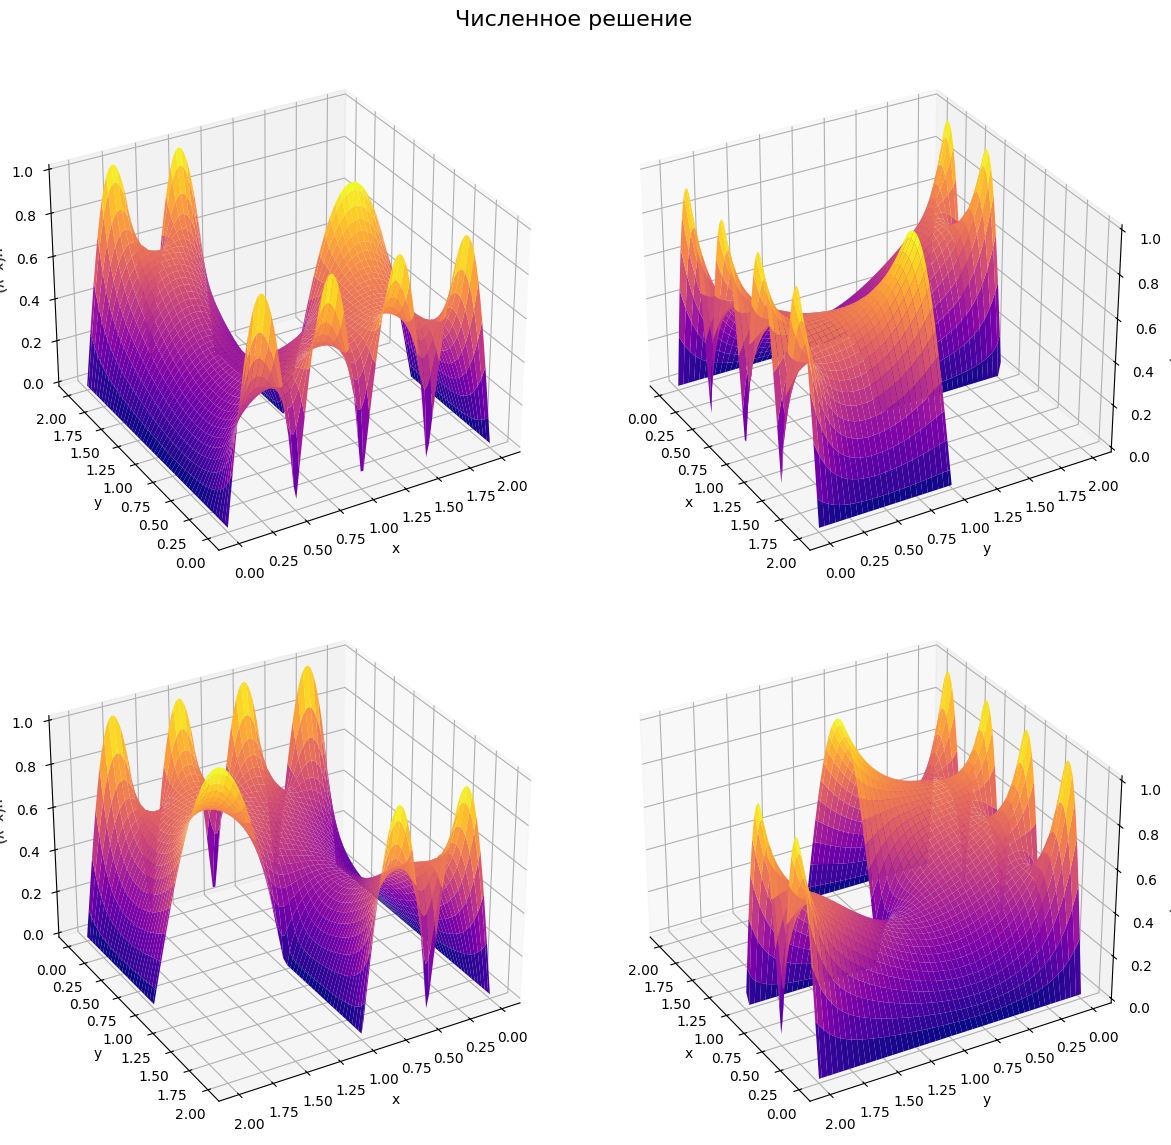

In [ ]:
mask = (Y <= d) & (X <= a) | (Y > d) & (X <= c)
X_masked = np.where(mask, X, np.nan)
Y_masked = np.where(mask, Y, np.nan)
u_masked = np.where(mask, u, np.nan)

fig = plt.figure(figsize=(12, 12))
fig.suptitle('Численное решение', fontsize=16)

angles = [(-120, 30), (-30, 30), (60, 30), (150, 30)]

for i, (azim, elev) in enumerate(angles):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.plot_surface(X_masked, Y_masked, u_masked, cmap='plasma')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x, y)')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()